## 1) Setup

In [50]:
if (!require(car)) install.packages("car",lib="../work/")
library(car)

if (!require(tidyverse)) install.packages("tidyverse", lib="../work/")
library(tidyverse)
    
if (!require(dplyr)) install.packages("dplyr", lib="../work/")
library(dplyr)
    
if (!require(fastDummies)) install.packages("fastDummies",lib="../work/")
library(fastDummies) 

if (!require(GGally)) install.packages("GGally",lib="../work/")
library(GGally) 

Loading required package: car

Loading required package: carData

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::recode() masks car::recode()
✖ purrr::some()   masks car::some()
Loading required package: fastDummies

Loading required package: GGally

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [3]:
# Import in Combined Kenai Data
combined_data = read.csv("../Data/Kenai_AP_combined.csv")
head(combined_data,5)

,Date,Maximum.Temperature..degF.,Precipitation..in.,Mean.Temperature..degF.,Cooling.Degree.Days,Minimum.Temperature..degF.,Heating.Degree.Days,Snowfall..in.,Growing.Degree.Days,Snow.Depth..in.
,<chr>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<lgl>,<int>,<lgl>
1,2000-01-01,-8,NA,-16.5,0,-25,81,NA,0,NA
2,2000-01-02,7,NA,-10.0,0,-27,75,NA,0,NA
3,2000-01-03,15,0.13,11.0,0,7,54,NA,0,NA
4,2000-01-04,16,0.02,13.0,0,10,52,NA,0,NA
5,2000-01-05,13,NA,2.0,0,-9,63,NA,0,NA


In [35]:
cat("The dataset contains ", dim(combined_data)[1] , "observations and ", dim(combined_data)[2]-1, " features (exclude date).") 

The dataset contains  8401 observations and  9  features (exclude date).

In [18]:
summarized = summary(combined_data)
summarized

     Date           Maximum.Temperature..degF. Precipitation..in.
 Length:8401        Min.   :-16.00             Min.   :0.0000    
 Class :character   1st Qu.: 32.00             1st Qu.:0.0000    
 Mode  :character   Median : 46.00             Median :0.0000    
                    Mean   : 44.52             Mean   :0.0562    
                    3rd Qu.: 59.00             3rd Qu.:0.0400    
                    Max.   : 89.00             Max.   :2.2300    
                    NA's   :14                 NA's   :1627      
 Mean.Temperature..degF. Cooling.Degree.Days Minimum.Temperature..degF.
 Min.   :-23.50          Min.   :0.000000    Min.   :-34.00            
 1st Qu.: 25.00          1st Qu.:0.000000    1st Qu.: 18.00            
 Median : 38.50          Median :0.000000    Median : 31.00            
 Mean   : 36.35          Mean   :0.003459    Mean   : 28.16            
 3rd Qu.: 51.00          3rd Qu.:0.000000    3rd Qu.: 43.00            
 Max.   : 70.00          Max.   :5.00000

In [37]:
max_tmp_col = combined_data$Maximum.Temperature..degF.
mean_tmp_col = combined_data$Mean.Temperature..degF.
min_tmp_col = combined_data$Minimum.Temperature..degF.
growing_col = combined_data$Growing.Degree.Days
precip_col = combined_data$Precipitation..in.
cooling_col = combined_data$Cooling.Degree.Days
heating_col = combined_data$Heating.Degree.Days
snowfall_col = combined_data$Snowfall..in.
snow_depth_col = combined_data$Snow.Depth..in.

In [48]:
cat("Max Water Temperature ranging from [", min(max_tmp_col, na.rm=T), ",",  max(max_tmp_col, na.rm=T), "] and total null of ", sum(is.na(max_tmp_col)), "\n")

cat("Mean Water Temperature ranging from [", min(mean_tmp_col, na.rm=T), ",",  max(mean_tmp_col, na.rm=T), "] and total null of ", sum(is.na(mean_tmp_col)), "\n")

cat("Min Water Temperature ranging from [", min(min_tmp_col, na.rm=T), ",",  max(min_tmp_col, na.rm=T), "] and total null of ", sum(is.na(min_tmp_col)), "\n")

cat("Growing Degree Temperature ranging from [", min(growing_col, na.rm=T), ",",  max(growing_col, na.rm=T), "] and total null of ", sum(is.na(growing_col)), "\n")

cat("Precipitation ranging from [", min(precip_col, na.rm=T), ",",  max(precip_col, na.rm=T), "] and total null of ", sum(is.na(precip_col)), "\n")

cat("Cooling ranging from [", min(cooling_col, na.rm=T), ",",  max(cooling_col, na.rm=T), "] and total null of ", sum(is.na(cooling_col)), "\n")

cat("Heating ranging from [", min(heating_col, na.rm=T), ",",  max(heating_col, na.rm=T), "] and total null of ", sum(is.na(heating_col)), "\n")

Max Water Temperature ranging from [ -16 , 89 ] and total null of  14 
Mean Water Temperature ranging from [ -23.5 , 70 ] and total null of  17 
Min Water Temperature ranging from [ -34 , 61 ] and total null of  13 
Growing Degree Temperature ranging from [ 0 , 20 ] and total null of  17 
Precipitation ranging from [ 0 , 2.23 ] and total null of  1627 
Cooling ranging from [ 0 , 5 ] and total null of  17 
Heating ranging from [ 0 , 88 ] and total null of  17 


### Max Water Temperature

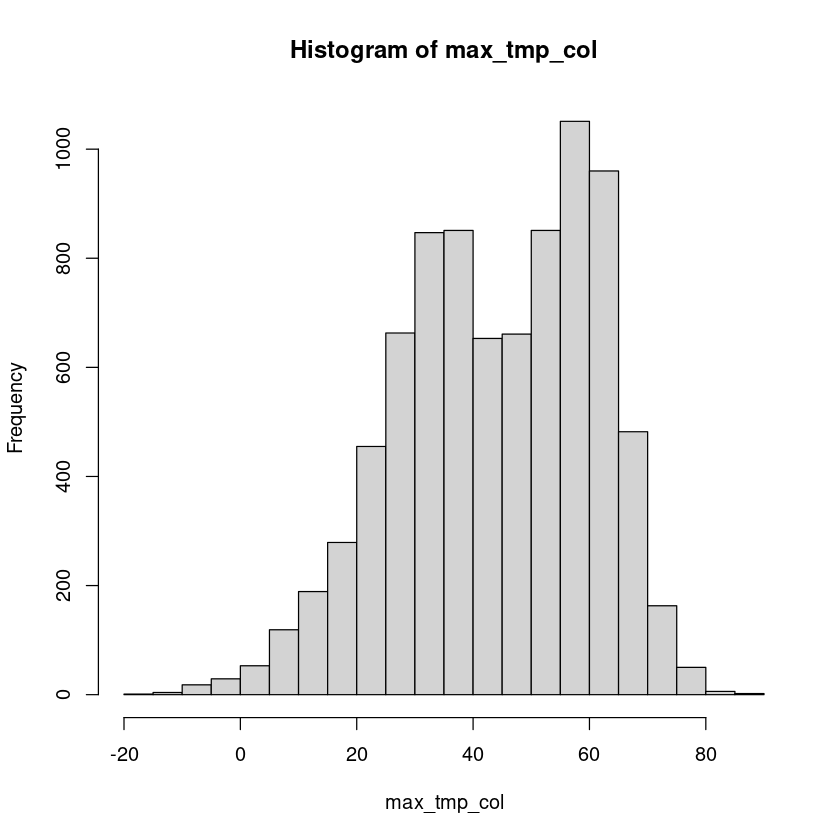

In [49]:
hist(max_tmp_col)

### Mean Water Temperature

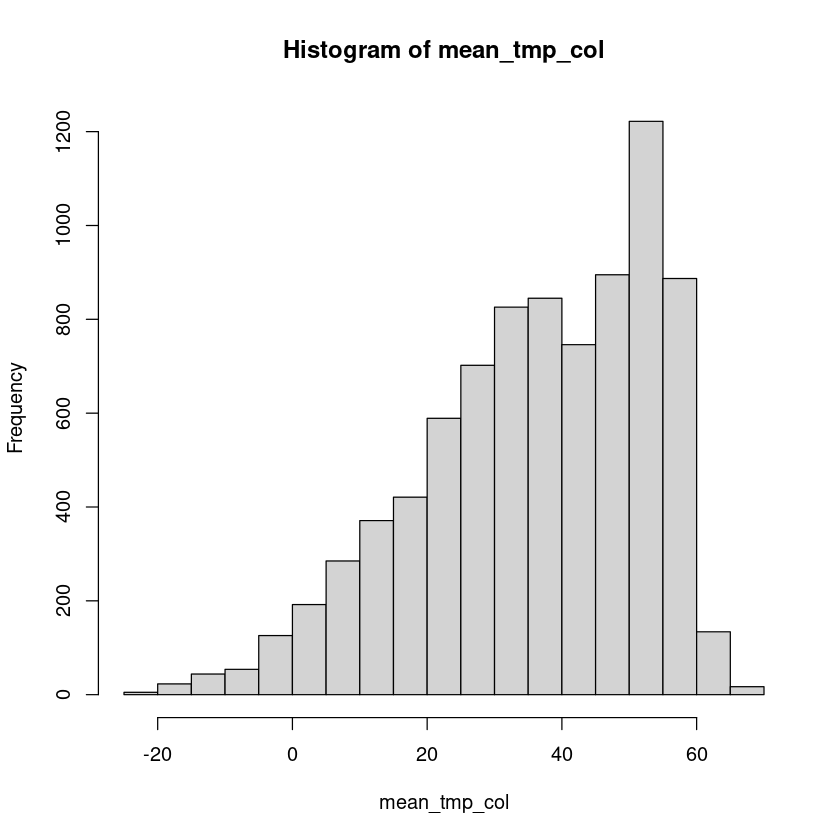

In [53]:
hist(mean_tmp_col)

### Min Water Temperature

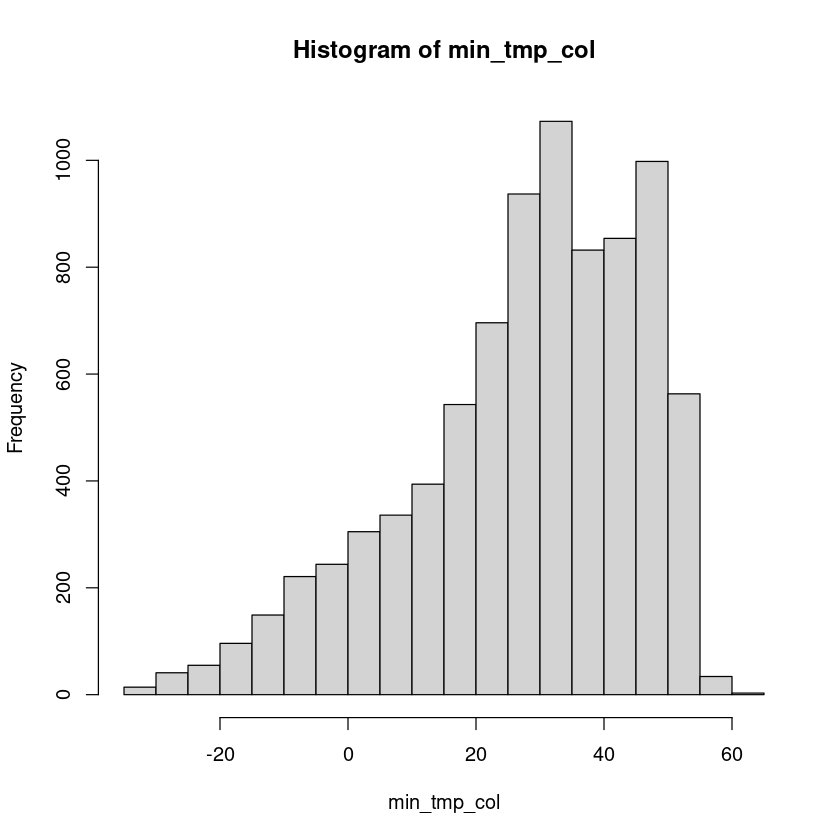

In [54]:
hist(min_tmp_col)

### Growing Degree Temperature

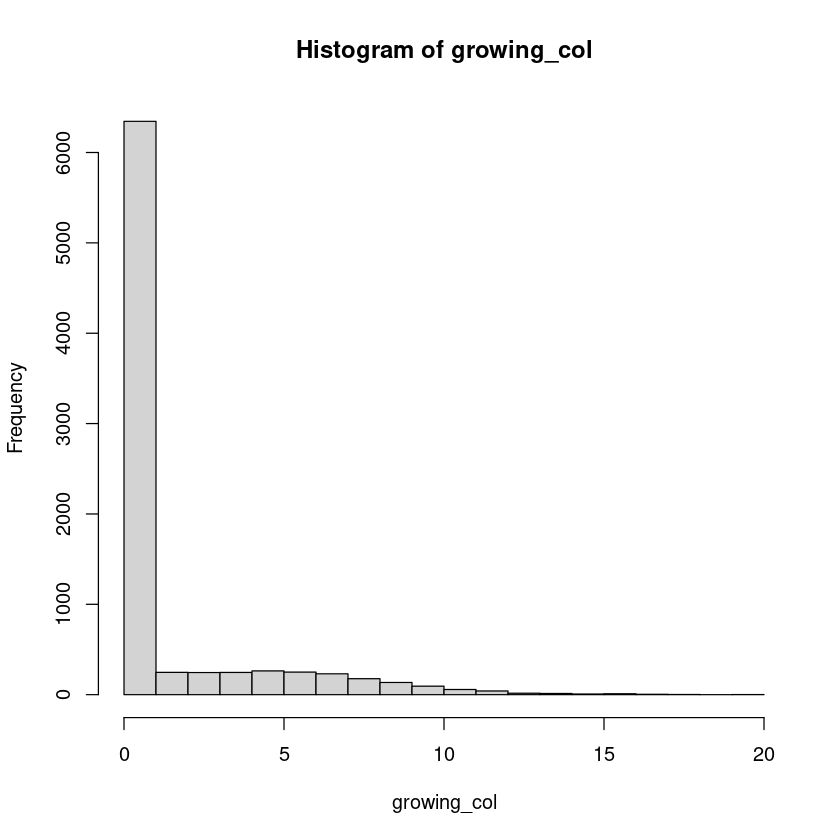

In [55]:
hist(growing_col)

### Precipitation Amount

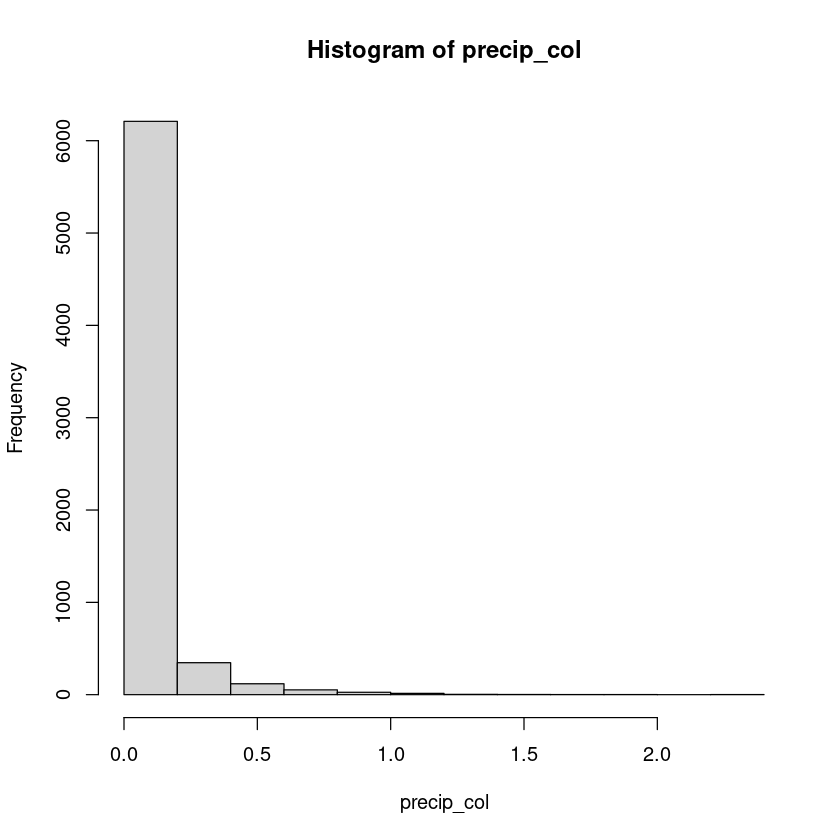

In [56]:
hist(precip_col)

### Cooling Temperatures

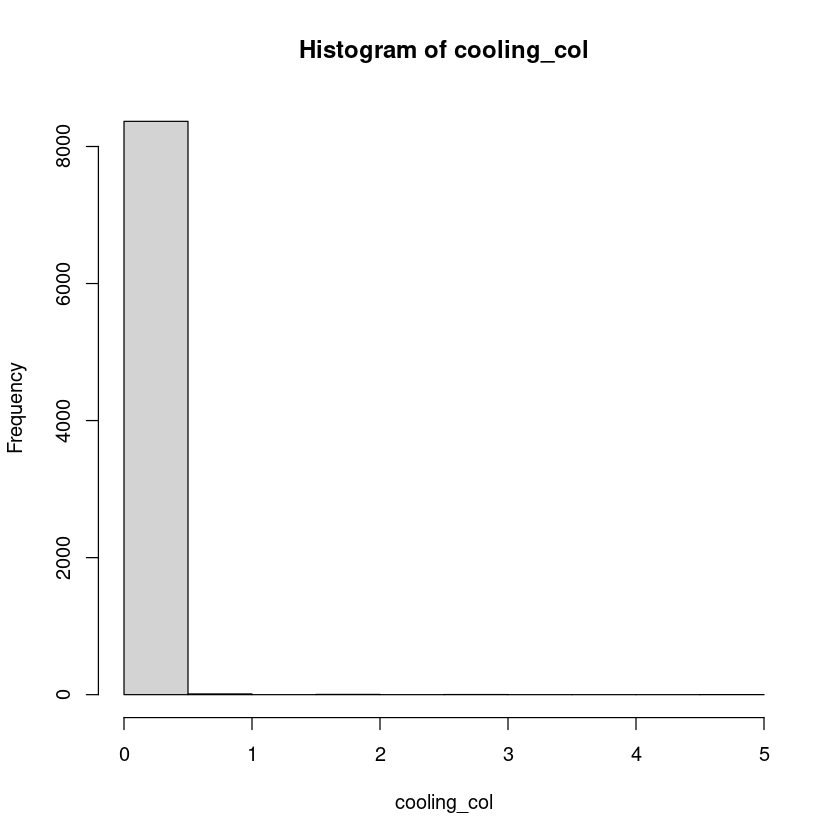

In [57]:
hist(cooling_col)

### Heating Temperatures

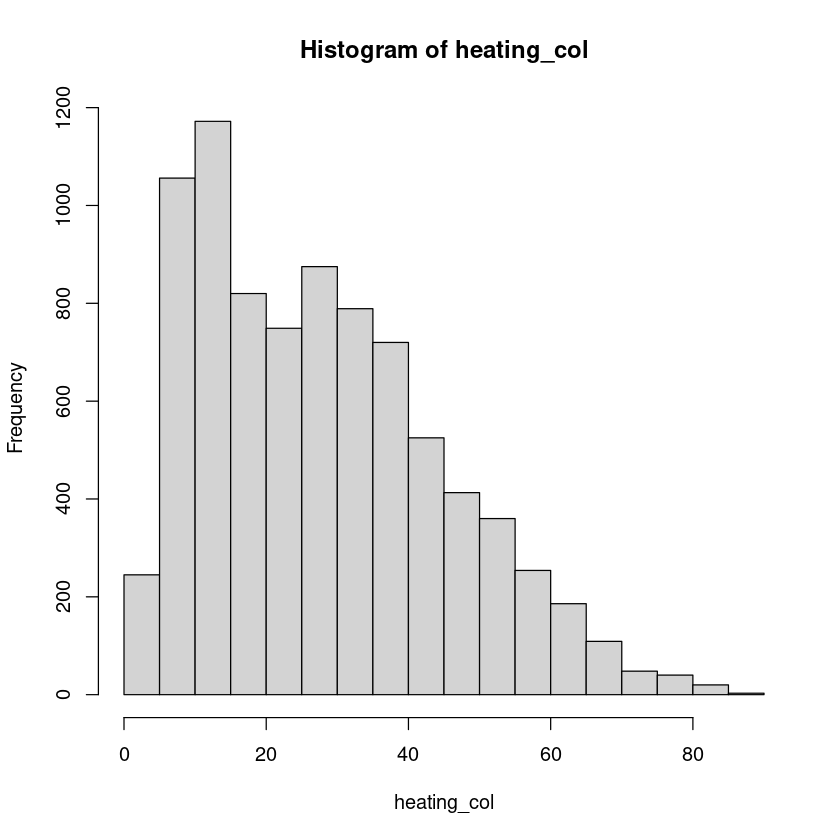

In [58]:
hist(heating_col)